## FuseNet with Classification Head - Loss and Accuracy Evaluation
<br>
<img src="./images/framework_class.jpg" style="width:80%;height:80%;margin:0px 45px">
<p> This notebook provides a simple script to visualize and evaluate the performance of the trained FuseNet models. With this notebook it is possible to evaluate FuseNet models with or without scene-classification head.</p> 
<p><b>Note:</b> Please don't forget to include 'class' word in the name of the checkpoints of the models with classification head. Distinction between two model types is done by the name of the checkpoints.</p>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from utils.data_utils import get_data

# set default size of plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2


## Plot the loss, training and validation accuracy 

During training sessions, training and validation accuracy is saved for the whole sets at the end of each epoch. Accuracy calculation is done globally, i.e. for semantic segmentation, global_accuracy = correctly_labelled_pixels / all_labelled_pixels, and for scene classification; global_accuracy = correctly_classified_scenes / all_scenes.

[INPUT] Enter checkpoint path please: /home/priya/Documents/stanford/cs231n/project/FuseNet_PyTorch/checkpoints/experiment/nyu/best_model.pth.tar
[INFO] Checkpoint loaded: /home/priya/Documents/stanford/cs231n/project/FuseNet_PyTorch/checkpoints/experiment/nyu/best_model.pth.tarh.tar   


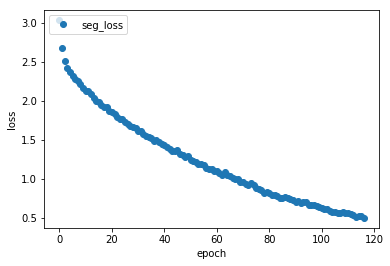

Minimum loss values achieved during training:
Global: 0.503 at epoch: 116


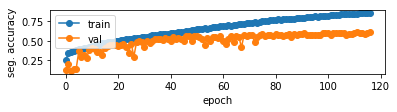

Best accuracy values achieved during training (on validation set):
Global pixel-wise classification: 0.610 achieved on epoch: 116


In [2]:
while True:
    data = input('[INPUT] Enter checkpoint path please: ')
    model_path = data
    break

if os.path.isfile(model_path):
    print('[PROGRESS] Loading checkpoint: {}   '.format(model_path), end='', flush=True)
    checkpoint = torch.load(model_path)
    print('\r[INFO] Checkpoint loaded: {}'.format(model_path))
    
    use_class = model_path.lower().find('class') is not -1
    loss_plot_num = 1
    
    trained_epoch = checkpoint['epoch']
    best_val_acc = checkpoint['best_val_seg_acc']
    train_loss_history = checkpoint['train_loss_hist']
    val_seg_acc_history = checkpoint['val_seg_acc_hist']
    train_seg_acc_history = checkpoint['train_seg_acc_hist']
    
    if use_class:
        train_seg_loss_history = checkpoint['train_seg_loss_hist']
        train_class_loss_history = checkpoint['train_class_loss_hist']
        train_class_acc_history = checkpoint['train_class_acc_hist']
        val_class_acc_history = checkpoint['val_class_acc_hist']
        loss_plot_num = 3
else:   
    raise FileNotFoundError('No checkpoint found at {}'.format(model_path))

plt.subplot(loss_plot_num, 1, 1)
plt.plot(train_loss_history, 'o')

if use_class:    
    plt.plot(train_seg_loss_history, 'o')
    plt.plot(train_class_loss_history, 'o')
    plt.legend(['glob_loss', 'seg_loss', 'class_loss'], loc='upper left')
else:
    plt.legend(['seg_loss'], loc='upper left')
    
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

print('Minimum loss values achieved during training:')
print('Global: %.3f at epoch: %i' % (np.min(train_loss_history), np.argmin(train_loss_history)))
if use_class:
    print('Segmentation: %.3f at epoch: %i' % (np.min(train_seg_loss_history), np.argmin(train_seg_loss_history)))
    print('Classification: %.3f at epoch: %i \n' % (np.min(train_class_loss_history), np.argmin(train_class_loss_history)))

plt.subplot(3, 1, 2)
plt.plot(train_seg_acc_history, '-o')
plt.plot(val_seg_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('seg. accuracy')
plt.show()

if use_class:
    plt.subplot(3, 1, 3)
    plt.plot(train_class_acc_history, '-o')
    plt.plot(val_class_acc_history, '-o')
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('class. accuracy')
    plt.show()

print('Best accuracy values achieved during training (on validation set):')
print('Global pixel-wise classification: %.3f achieved on epoch: %i' % (np.max(val_seg_acc_history), np.argmax(val_seg_acc_history)))
if use_class:
    print('Global scene classification: %.3f achieved on epoch: %i' % (np.max(val_class_acc_history), np.argmax(val_class_acc_history)))